<a href="https://colab.research.google.com/github/Shivp55/DAML/blob/main/ML_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Loading the Datasets from Drive**

In [24]:
# Load the data files
electricity_2023 = pd.read_csv('/content/drive/MyDrive/ML/Dataset 1/Electricity Usage 2023.csv')
electricity_2024 = pd.read_csv('/content/drive/MyDrive/ML/Dataset 1/Electricity Usage 2024.csv')
gas_2023 = pd.read_csv('/content/drive/MyDrive/ML/Dataset 1/Gas Usage 2023.csv')
gas_2024 = pd.read_csv('/content/drive/MyDrive/ML/Dataset 1/Gas Usage 2024.csv')
gas_2023.head(), gas_2024.head(), electricity_2023.head(), electricity_2024.head()

(         Date  Values  00:00  00:15  00:30  00:45  01:00  01:15  01:30  01:45  \
 0  01/01/2023      96   11.0   11.0    0.0    0.0    0.0    0.0    0.0    0.0   
 1  02/01/2023      96    0.0    0.0    0.0    0.0    0.0    0.0   33.0   11.0   
 2  03/01/2023      96    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 3  04/01/2023      96    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 4  05/01/2023      96    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 
    ...  21:30  21:45  22:00  22:15  22:30  22:45  23:00  23:15  23:30  23:45  
 0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 1  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 2  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 3  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 4  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 
 [5 rows x 98 columns],


# **Data Pre- Processing**

In [4]:
# Define the function to clean and preprocess data
def clean_data(df, time_columns):
    # Step 1: Standardize column names (lowercase and remove spaces)
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # Step 2: Convert date columns to datetime format (if applicable)
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

    # Step 3: Check for null values, NaN values, and missing values
    print("Checking for null values, NaN values, and missing values:")
    print(df.isnull().sum())  # Shows the count of null/NaN values in each column

    # Step 4: Check for duplicate rows
    print("\nChecking for duplicate rows:")
    print(df.duplicated().sum())  # Shows the number of duplicate rows

    # Step 5: Check for empty cells (cells with empty strings)
    print("\nChecking for empty cells:")
    empty_cells = (df == '').sum()
    print(empty_cells)  # Shows the count of empty cells in each column

    # Step 6: Handle missing values in time columns (fill NaN with row mean)
    df[time_columns] = df[time_columns].apply(
        lambda row: row.fillna(row.mean()) if not row.isnull().all() else row, axis=1
    )

    # Step 7: Drop rows where all time columns are NaN
    df_cleaned = df.dropna(subset=time_columns, how='all')

    # Step 8: Remove duplicate rows
    df_cleaned = df_cleaned.drop_duplicates()

    # Step 9: Remove empty strings in numeric columns (convert to NaN if empty)
    for col in time_columns:
        df_cleaned[col] = df_cleaned[col].replace('', np.nan)

    # Step 10: Handle outliers (Z-score method)
    # You can choose to remove rows where time column values are outliers (optional)
    df_cleaned[time_columns] = df_cleaned[time_columns].apply(
        lambda x: x[(np.abs(stats.zscore(x)) < 3)]  # Keep rows with Z-scores less than 3
    )

    # Step 11: Recheck for missing values after cleaning
    print("\nChecking for missing values after cleaning:")
    print(df_cleaned.isnull().sum())

    # Step 12: Reset index after dropping rows
    df_cleaned = df_cleaned.reset_index(drop=True)

    # Step 13: Return the cleaned and preprocessed DataFrame
    return df_cleaned

# Apply the function to each dataset
time_columns = electricity_2023.columns[2:]  # Adjust if time columns start from the 3rd column

electricity_2023 = clean_data(electricity_2023, time_columns)
electricity_2024 = clean_data(electricity_2024, time_columns)
gas_2023 = clean_data(gas_2023, time_columns)
gas_2024 = clean_data(gas_2024, time_columns)

# Assign cleaned data to new variables
df_electricity_2023 = electricity_2023
df_electricity_2024 = electricity_2024
df_gas_2023 = gas_2023
df_gas_2024 = gas_2024

# Display the data types after cleaning
print("\nData types after cleaning:")
print(df_electricity_2023.dtypes)

# Optionally, print a sample of the cleaned data for verification
print("\nSample of cleaned data:")
print(df_electricity_2023.head())


Checking for null values, NaN values, and missing values:
date      0
values    0
00:00     0
00:15     0
00:30     0
         ..
22:45     0
23:00     0
23:15     0
23:30     0
23:45     0
Length: 98, dtype: int64

Checking for duplicate rows:
0

Checking for empty cells:
date      0
values    0
00:00     0
00:15     0
00:30     0
         ..
22:45     0
23:00     0
23:15     0
23:30     0
23:45     0
Length: 98, dtype: int64

Checking for missing values after cleaning:
date      0
values    0
00:00     3
00:15     3
00:30     3
         ..
22:45     3
23:00     3
23:15     3
23:30     3
23:45     3
Length: 98, dtype: int64
Checking for null values, NaN values, and missing values:
date        0
values      0
00:00     130
00:15     130
00:30     130
         ... 
22:45     131
23:00     131
23:15     131
23:30     131
23:45     131
Length: 98, dtype: int64

Checking for duplicate rows:
0

Checking for empty cells:
date      0
values    0
00:00     0
00:15     0
00:30     0
         ..

In [5]:
electricity_2023.tail()

,date,values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
360,2023-12-27,96,24.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,...,26.0,25.0,26.0,26.0,25.0,26.0,26.0,25.0,26.0,25.0
361,2023-12-28,96,26.0,26.0,26.0,25.0,26.0,26.0,26.0,27.0,...,28.0,28.0,28.0,28.0,29.0,29.0,28.0,29.0,28.0,28.0
362,2023-12-29,96,29.0,28.0,29.0,29.0,29.0,29.0,29.0,29.0,...,29.0,28.0,28.0,30.0,28.0,28.0,29.0,28.0,28.0,28.0
363,2023-12-30,96,29.0,28.0,29.0,27.0,28.0,28.0,29.0,28.0,...,27.0,26.0,27.0,26.0,26.0,27.0,26.0,27.0,27.0,26.0
364,2023-12-31,96,27.0,28.0,27.0,27.0,27.0,27.0,26.0,27.0,...,27.0,26.0,27.0,27.0,27.0,26.0,26.0,26.0,26.0,27.0


In [6]:
gas_2023.describe()

,date,values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
count,365,365.0,359.000000,355.000000,357.000000,360.000000,353.000000,356.000000,358.000000,357.000000,...,359.000000,359.000000,343.000000,358.000000,355.000000,358.000000,355.000000,358.000000,361.000000,358.000000
mean,2023-07-02 00:00:00,96.0,1.991643,2.261972,1.941176,2.081431,1.966899,2.073919,2.123786,2.156863,...,1.961003,1.930362,0.673469,1.689944,1.828169,1.597765,2.045070,2.058659,2.376731,2.212291
min,2023-01-01 00:00:00,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-04-02 00:00:00,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2023-07-02 00:00:00,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023-10-01 00:00:00,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023-12-31 00:00:00,96.0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,11.000000,22.000000,22.000000,22.000000,22.000000,22.000000,33.000000,22.000000
std,NaN,0.0,5.732631,6.350550,5.648845,5.845031,5.561132,5.797148,5.877107,6.122168,...,5.772564,5.927226,2.641011,5.478398,5.459279,5.023217,6.011589,5.658282,6.588450,6.036738


In [7]:
gas_2024.describe()

,date,values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
count,236,236.0,232.000000,233.000000,234.000000,234.000000,232.000000,233.000000,234.000000,230.000000,...,233.000000,232.000000,234.000000,233.000000,233.000000,232.000000,231.000000,233.000000,233.000000,235.000000
mean,2024-04-27 12:00:00,96.0,9.340517,9.111588,9.730769,8.790598,9.672414,9.064378,8.555556,9.230435,...,9.497287,8.495120,8.751572,8.364240,8.364240,7.831327,9.722372,9.733339,9.261236,9.229225
min,2024-01-01 00:00:00,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-02-28 18:00:00,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-04-27 12:00:00,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2024-06-25 06:00:00,96.0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
max,2024-08-23 00:00:00,96.0,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
std,NaN,0.0,12.361457,12.194738,12.479346,11.565217,12.380529,11.862000,11.585061,12.142672,...,12.585114,11.466273,11.802837,11.479139,11.614643,11.484056,12.477008,12.339427,12.366191,12.159660


In [8]:
electricity_2023.describe()

,date,values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
count,365,365.0,362.000000,362.000000,362.000000,362.000000,361.000000,362.000000,362.000000,361.000000,...,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,2023-07-02 00:00:00,96.0,30.502762,30.513812,30.466851,30.413194,30.486360,30.377282,30.382807,30.445983,...,31.430939,31.196133,30.988950,30.834254,30.748619,30.502762,30.472376,30.533149,30.453039,30.483425
min,2023-01-01 00:00:00,96.0,24.000000,25.000000,24.000000,25.000000,24.000000,25.000000,24.000000,24.000000,...,24.000000,25.000000,24.000000,25.000000,24.000000,24.000000,24.000000,24.000000,25.000000,24.000000
25%,2023-04-02 00:00:00,96.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,30.000000,30.000000,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
50%,2023-07-02 00:00:00,96.0,31.000000,31.000000,30.000000,31.000000,31.000000,30.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
75%,2023-10-01 00:00:00,96.0,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,33.000000,33.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
max,2023-12-31 00:00:00,96.0,38.000000,35.000000,36.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,39.000000,39.000000,38.000000,36.000000,37.000000,35.000000,34.000000,36.000000,35.000000,35.000000
std,NaN,0.0,1.955529,1.975214,2.013873,2.007758,2.006679,1.944165,1.964350,1.925845,...,2.537679,2.457999,2.245313,2.203029,2.148326,2.053642,1.980671,2.054724,1.987288,2.069700


In [9]:
electricity_2024.describe()

,date,values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
count,236,236.0,232.000000,232.000000,234.000000,234.000000,233.000000,234.000000,233.000000,233.000000,...,234.000000,233.000000,231.000000,233.000000,231.000000,232.000000,232.000000,232.000000,233.000000,232.000000
mean,2024-04-27 12:00:00,96.0,34.202586,33.918103,33.807692,33.833333,33.927039,33.709402,33.927039,33.918455,...,35.136752,34.927039,34.593074,34.424893,34.324675,34.215517,34.232759,34.155172,34.068670,34.215517
min,2024-01-01 00:00:00,96.0,27.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,25.000000,25.000000,26.000000,25.000000,26.000000,26.000000,26.000000,26.000000,25.000000,26.000000
25%,2024-02-28 18:00:00,96.0,33.000000,32.000000,33.000000,32.000000,33.000000,32.000000,33.000000,33.000000,...,33.250000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
50%,2024-04-27 12:00:00,96.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,35.000000,35.000000,35.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
75%,2024-06-25 06:00:00,96.0,36.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,37.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
max,2024-08-23 00:00:00,96.0,41.000000,40.000000,41.000000,41.000000,41.000000,40.000000,41.000000,41.000000,...,44.000000,45.000000,43.000000,43.000000,43.000000,42.000000,43.000000,40.000000,41.000000,41.000000
std,NaN,0.0,2.596600,2.573124,2.628946,2.679200,2.629212,2.641887,2.554374,2.600937,...,3.268804,3.245527,3.007056,2.898376,2.758898,2.784639,2.629693,2.555373,2.786127,2.593051


# **Data Visualization of Electricity and Gas Usage on Daily Basis**

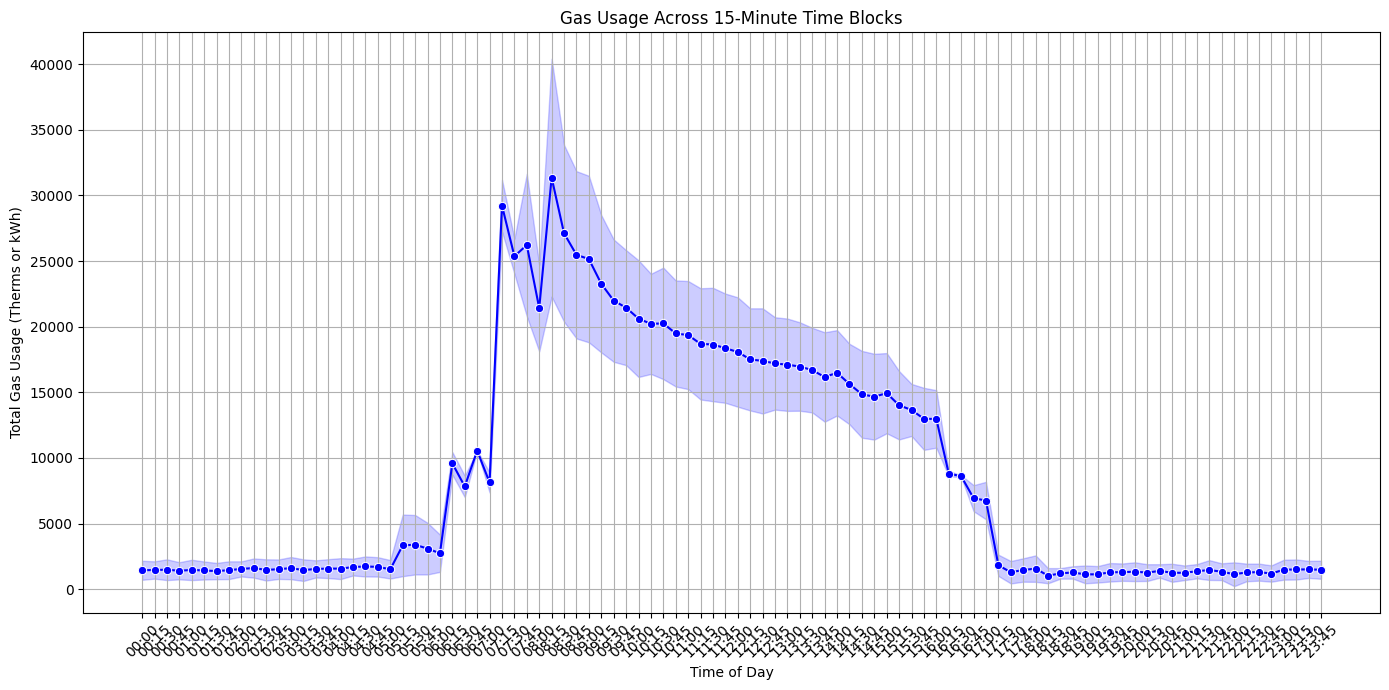

In [10]:
# Function to aggregate and sum gas usage by time block
def aggregate_usage(df, time_columns):
    # Sum the usage across all rows for each time block
    time_block_usage = df[time_columns].sum().reset_index()
    time_block_usage.columns = ['Time Block', 'Total Usage']
    # Convert 'Time Block' to a proper time format for sorting
    time_block_usage['Time Block'] = pd.to_datetime(time_block_usage['Time Block'], format='%H:%M').dt.strftime('%H:%M')

    # Sort by time block to ensure chronological order
    time_block_usage.sort_values('Time Block', inplace=True)

    return time_block_usage

# Aggregate gas usage data for 2023 and 2024
gas_usage_2023 = aggregate_usage(df_gas_2023, time_columns)
gas_usage_2024 = aggregate_usage(df_gas_2024, time_columns)
electricity_usage_2023 = aggregate_usage(df_electricity_2023, time_columns)
electricity_usage_2024 = aggregate_usage(df_electricity_2024, time_columns)
# Create a combined DataFrame for gas usage
gas_usage = pd.concat([gas_usage_2023, gas_usage_2024], ignore_index=True)
gas_usage['Type'] = 'Gas'  # Add a column to label the data as 'Gas'

# Plotting the gas usage data
plt.figure(figsize=(14, 7))
sns.lineplot(data=gas_usage, x='Time Block', y='Total Usage', marker='o', color='blue')

# Adding plot details
plt.title('Gas Usage Across 15-Minute Time Blocks')
plt.xlabel('Time of Day')
plt.ylabel('Total Gas Usage (Therms or kWh)')  # Adjust the unit based on your data
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


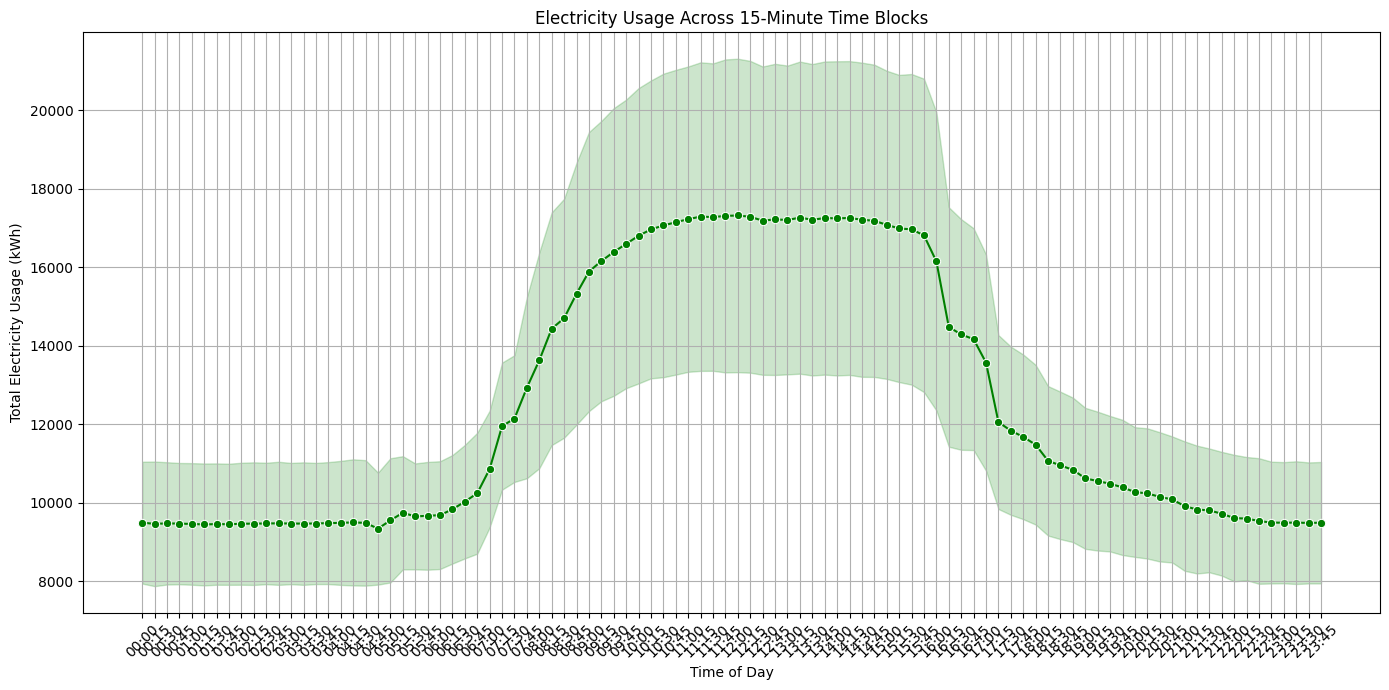

In [11]:
# Create a combined DataFrame for electricity usage
electricity_usage = pd.concat([electricity_usage_2023, electricity_usage_2024], ignore_index=True)
electricity_usage['Type'] = 'Electricity'  # Add a column to label the data as 'Electricity'

# Plotting the electricity usage data
plt.figure(figsize=(14, 7))
sns.lineplot(data=electricity_usage, x='Time Block', y='Total Usage', marker='o', color='green')

# Adding plot details
plt.title('Electricity Usage Across 15-Minute Time Blocks')
plt.xlabel('Time of Day')
plt.ylabel('Total Electricity Usage (kWh)')  # Adjust the unit based on your data
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


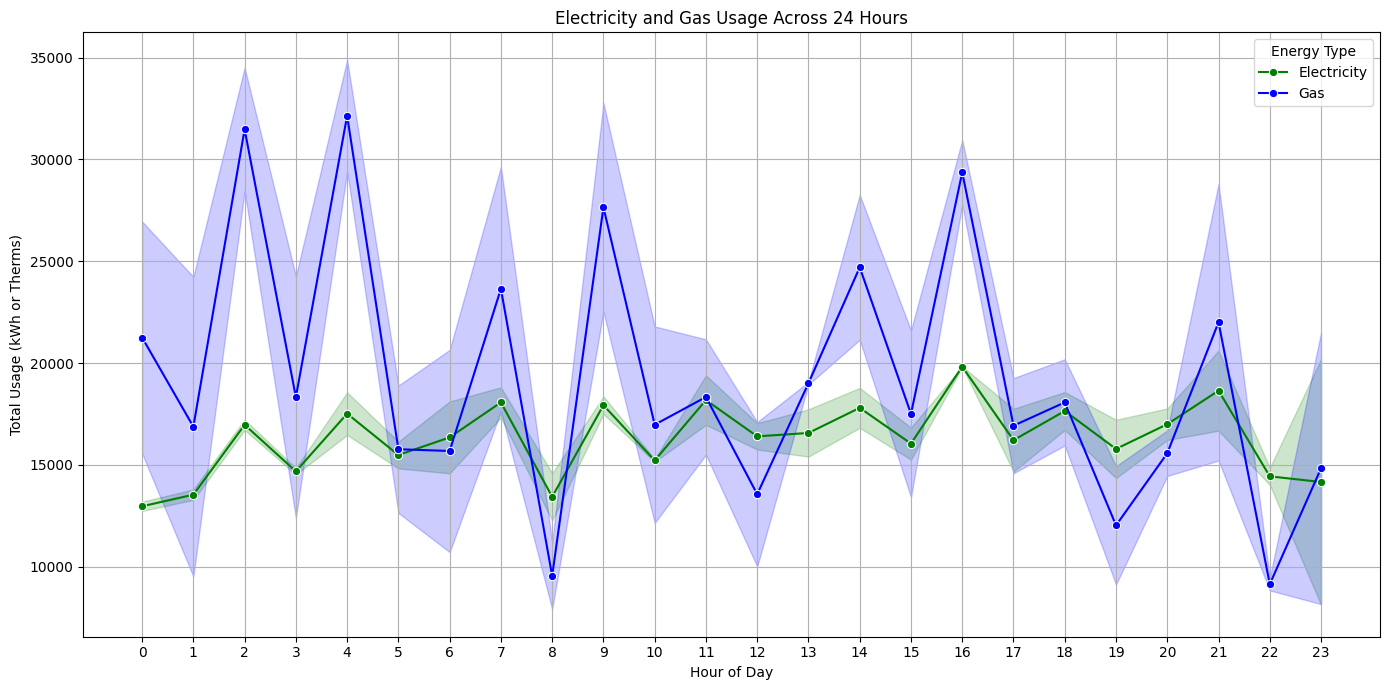

In [12]:
# Function to aggregate usage by hour from 15-minute intervals
def aggregate_to_hourly(df, time_columns):
    # First, ensure the 'Time Block' is in a datetime format
    time_block_usage = df[time_columns].sum().reset_index()
    time_block_usage.columns = ['Time Block', 'Total Usage']

    df['Hour'] = pd.to_datetime(time_block_usage['Time Block'], format='%H:%M').dt.strftime('%H').astype(int)

    # Sum the usage across each hour (group by 'Hour')
    hourly_usage = df.groupby('Hour')[time_columns].sum().sum(axis=1).reset_index()
    hourly_usage.columns = ['Hour', 'Total Usage']

    return hourly_usage

# Aggregate electricity usage data to hourly totals
electricity_usage_hourly_2023 = aggregate_to_hourly(df_electricity_2023, time_columns)
electricity_usage_hourly_2024 = aggregate_to_hourly(df_electricity_2024, time_columns)

# Combine both years of electricity usage
electricity_usage_hourly = pd.concat([electricity_usage_hourly_2023, electricity_usage_hourly_2024], ignore_index=True)

# Aggregate gas usage data to hourly totals
gas_usage_hourly_2023 = aggregate_to_hourly(df_gas_2023, time_columns)
gas_usage_hourly_2024 = aggregate_to_hourly(df_gas_2024, time_columns)

# Combine both years of gas usage
gas_usage_hourly = pd.concat([gas_usage_hourly_2023, gas_usage_hourly_2024], ignore_index=True)

# Plotting the hourly data for both electricity and gas usage
plt.figure(figsize=(14, 7))

# Plot electricity usage (green color)
sns.lineplot(data=electricity_usage_hourly, x='Hour', y='Total Usage', label='Electricity', marker='o', color='green')

# Plot gas usage (blue color)
sns.lineplot(data=gas_usage_hourly, x='Hour', y='Total Usage', label='Gas', marker='o', color='blue')

# Adding plot details
plt.title('Electricity and Gas Usage Across 24 Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Total Usage (kWh or Therms)')  # Adjust units based on data
plt.grid(True)
plt.xticks(range(24))  # Displaying hours of the day
plt.tight_layout()
plt.legend(title='Energy Type')

# Show the plot
plt.show()


# **Processing data of Electricity and Gas Usage on a Monthly Basis of 2023 and 2024**

In [13]:
# Visualizing the month based trend
def process_datasets(datasets):
    # A list to store the processed dataframes
    processed_dfs = []

    for df in datasets:
        # Step 1: Remove the second column (Values column) by using column names instead of indices
        # Assuming the second column is the 'Values' column
        if 'values' in df.columns:
            df = df.drop('values', axis=1)

        # Step 2: Ensure that only numeric columns are selected (excluding the Date column)
        # We can use `select_dtypes` to include only numeric columns, excluding 'Date'
        numeric_df = df.select_dtypes(include=[np.number])

        # Step 3: Sum all the numeric columns (time interval columns)
        df['total_units'] = numeric_df.sum(axis=1)

        # Step 4: Keep only the Date column and the total_units column
        df_total_units = df[['date', 'total_units']]

        # Step 5: Drop rows where 'total_units' is 0
        df_total_units = df_total_units[df_total_units['total_units'] != 0]

        # Append the processed dataframe to the list
        processed_dfs.append(df_total_units)

    return processed_dfs

# Example usage:
# Assuming df_electricity_2023, df_electricity_2024, df_gas_2023, df_gas_2024 are your cleaned datasets
datasets = [df_electricity_2023, df_electricity_2024, df_gas_2023, df_gas_2024]
processed_datasets = process_datasets(datasets)

# Cleaned and Processed datasets
cleaned_df1_electricity_2023 = processed_datasets[0]
cleaned_df2_electricity_2024 = processed_datasets[1]
cleaned_df3_gas_2023 = processed_datasets[2]
cleaned_df4_gas_2024 = processed_datasets[3]

# Display information about each processed dataset
cleaned_df1_electricity_2023.info()
cleaned_df2_electricity_2024.info()
cleaned_df3_gas_2023.info()
cleaned_df4_gas_2024.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         365 non-null    datetime64[ns]
 1   total_units  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         236 non-null    datetime64[ns]
 1   total_units  236 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         342 non-null    datetime64[ns]
 1   total_units  342 non-null    fl

In [14]:
def describe_multiple_datasets(datasets, labels):
    description_dict = {}

    for df, label in zip(datasets, labels):
        description_dict[label] = df.describe()

    return description_dict

# List of your datasets
datasets = [cleaned_df1_electricity_2023, cleaned_df2_electricity_2024, cleaned_df3_gas_2023, cleaned_df4_gas_2024]

# Labels to identify the datasets
labels = ['Electricity 2023', 'Electricity 2024', 'Gas 2023', 'Gas 2024']

# Get the descriptions of all datasets
dataset_descriptions = describe_multiple_datasets(datasets, labels)

# Print the descriptions for all datasets
for label, description in dataset_descriptions.items():
    print(f"Description for {label}:\n")
    print(description)
    print("\n" + "="*50 + "\n")

Description for Electricity 2023:

                      date  total_units
count                  365   365.000000
mean   2023-07-02 00:00:00  3931.430594
min    2023-01-01 00:00:00   400.000000
25%    2023-04-02 00:00:00  3043.000000
50%    2023-07-02 00:00:00  4320.000000
75%    2023-10-01 00:00:00  4565.000000
max    2023-12-31 00:00:00  5098.000000
std                    NaN   836.889945


Description for Electricity 2024:

                      date  total_units
count                  236   236.000000
mean   2024-04-27 12:00:00  4107.062347
min    2024-01-01 00:00:00  1267.000000
25%    2024-02-28 18:00:00  3437.900000
50%    2024-04-27 12:00:00  4360.000000
75%    2024-06-25 06:00:00  4598.250000
max    2024-08-23 00:00:00  5288.000000
std                    NaN   718.139133


Description for Gas 2023:

                                date  total_units
count                            342   342.000000
mean   2023-06-30 20:33:41.052631552  2784.285265
min              2023-01-01 0

In [15]:
cleaned_df2_electricity_2024

,date,total_units
0,2024-01-01,2756.978947
1,2024-01-02,2995.473684
2,2024-01-03,3464.200000
3,2024-01-04,3979.452632
4,2024-01-05,3831.905263
...,...,...
231,2024-08-19,4382.000000
232,2024-08-20,4417.000000
233,2024-08-21,4461.000000
234,2024-08-22,4529.000000


In [16]:
def process_monthly_units_2023(df):
    # Step 1: Ensure 'Date' is in datetime format
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)

    # Step 2: Extract the month and year from the 'Date' column
    df['Month'] = df['date'].dt.month  # Numeric month (1 = January, 2 = February, etc.)
    df['Year'] = df['date'].dt.year  # Extract the year

    # Step 3: Group by the 'Year' and 'Month' columns and sum the 'total_units' for each month
    monthly_units = df.groupby(['Year', 'Month'], as_index=False)['total_units'].sum()

    # Step 4: Sort by 'Year' and 'Month' to get the months in chronological order
    monthly_units = monthly_units.sort_values(by=['Year', 'Month'])

    # Step 5: Create a new 'Date' column with the month name and year
    monthly_units['Months_2023'] = monthly_units['Month'].apply(lambda x: pd.to_datetime(f"{x}-1-2020").strftime('%B'))

    # Step 6: Drop the 'Year' and 'Month' columns
    monthly_units = monthly_units[['Months_2023', 'total_units']]

    return monthly_units

# Process each dataset separately
monthly_electricity_2023 = process_monthly_units_2023(cleaned_df1_electricity_2023)
monthly_gas_2023 = process_monthly_units_2023(cleaned_df3_gas_2023)

monthly_electricity_2023.head()

,Months_2023,total_units
0,January,121885.210526
1,February,117575.000000
2,March,128058.000000
3,April,101323.172414
4,May,117395.000000


# **Plotting Different graphs to Identify the trends and outcomes over the years 2023 and 2024**

In [17]:
def process_monthly_units_2024(df):
    # Step 1: Ensure 'Date' is in datetime format
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)

    # Step 2: Extract the month and year from the 'Date' column
    df['Month'] = df['date'].dt.month  # Numeric month (1 = January, 2 = February, etc.)
    df['Year'] = df['date'].dt.year  # Extract the year

    # Step 3: Group by the 'Year' and 'Month' columns and sum the 'total_units' for each month
    monthly_units = df.groupby(['Year', 'Month'], as_index=False)['total_units'].sum()

    # Step 4: Sort by 'Year' and 'Month' to get the months in chronological order
    monthly_units = monthly_units.sort_values(by=['Year', 'Month'])

    # Step 5: Create a new 'Date' column with the month name and year
    monthly_units['Months_2024'] = monthly_units['Month'].apply(lambda x: pd.to_datetime(f"{x}-1-2020").strftime('%B'))

    # Step 6: Drop the 'Year' and 'Month' columns
    monthly_units = monthly_units[['Months_2024', 'total_units']]

    return monthly_units

# Process each dataset separately
monthly_electricity_2024 = process_monthly_units_2024(cleaned_df2_electricity_2024)
monthly_gas_2024 = process_monthly_units_2024(cleaned_df4_gas_2024)

monthly_electricity_2024.head()

,Months_2024,total_units
0,January,120000.568421
1,February,118938.673684
2,March,140118.000000
3,April,131248.000000
4,May,125156.000000


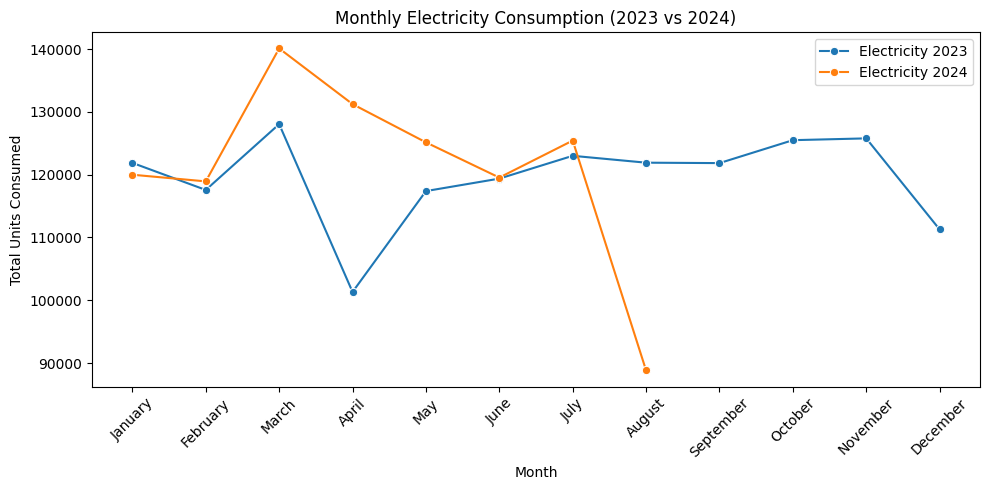

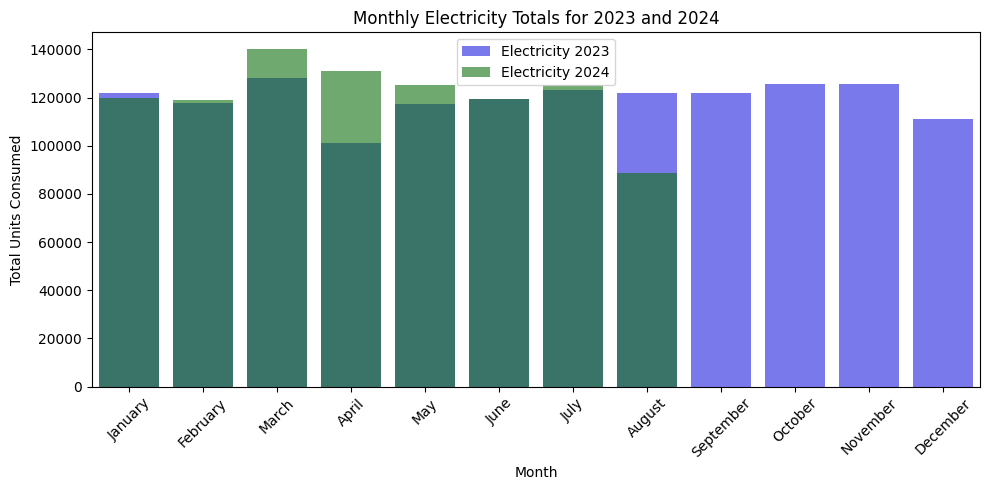

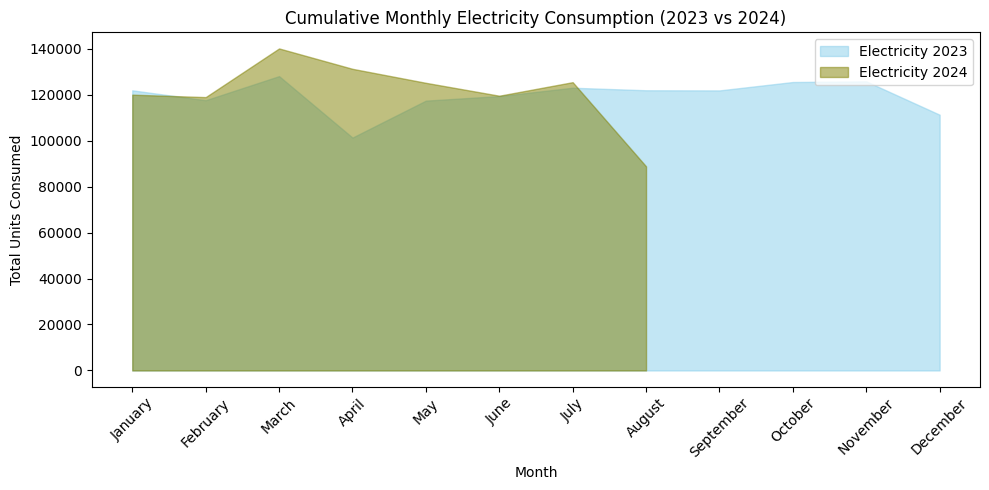

In [18]:
# Line Plot for Monthly Electricity Consumption Comparison (2023 vs 2024)
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_electricity_2023, x='Months_2023', y='total_units', label='Electricity 2023', marker='o')
sns.lineplot(data=monthly_electricity_2024, x='Months_2024', y='total_units', label='Electricity 2024', marker='o')
plt.title('Monthly Electricity Consumption (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Total Units Consumed')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Bar Plot for Monthly Electricity Totals in 2023 and 2024
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_electricity_2023, x='Months_2023', y='total_units', color='blue', alpha=0.6, label='Electricity 2023')
sns.barplot(data=monthly_electricity_2024, x='Months_2024', y='total_units', color='green', alpha=0.6, label='Electricity 2024')
plt.title('Monthly Electricity Totals for 2023 and 2024')
plt.xlabel('Month')
plt.ylabel('Total Units Consumed')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Area Plot for Cumulative Monthly Electricity Consumption (2023 vs 2024)
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_electricity_2023['Months_2023'], monthly_electricity_2023['total_units'], color="skyblue", alpha=0.5, label='Electricity 2023')
plt.fill_between(monthly_electricity_2024['Months_2024'], monthly_electricity_2024['total_units'], color="olive", alpha=0.5, label='Electricity 2024')
plt.title('Cumulative Monthly Electricity Consumption (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Total Units Consumed')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



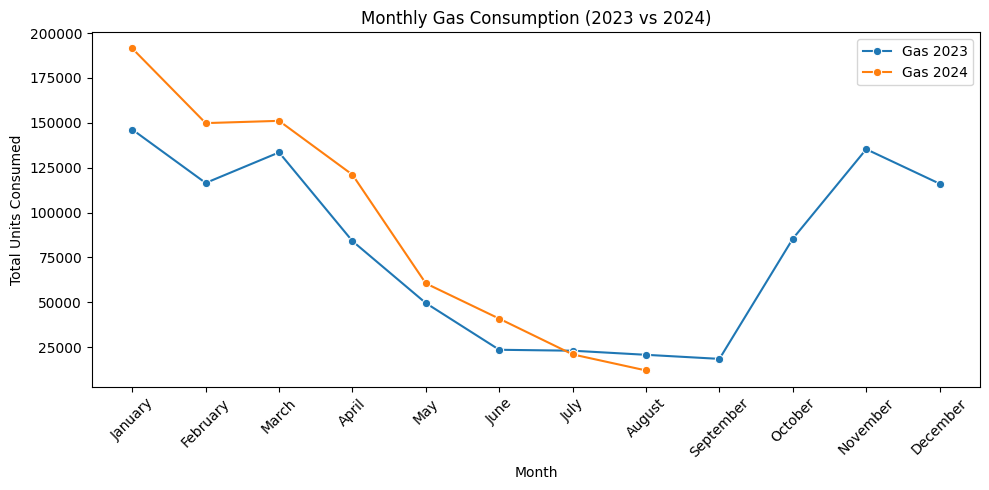

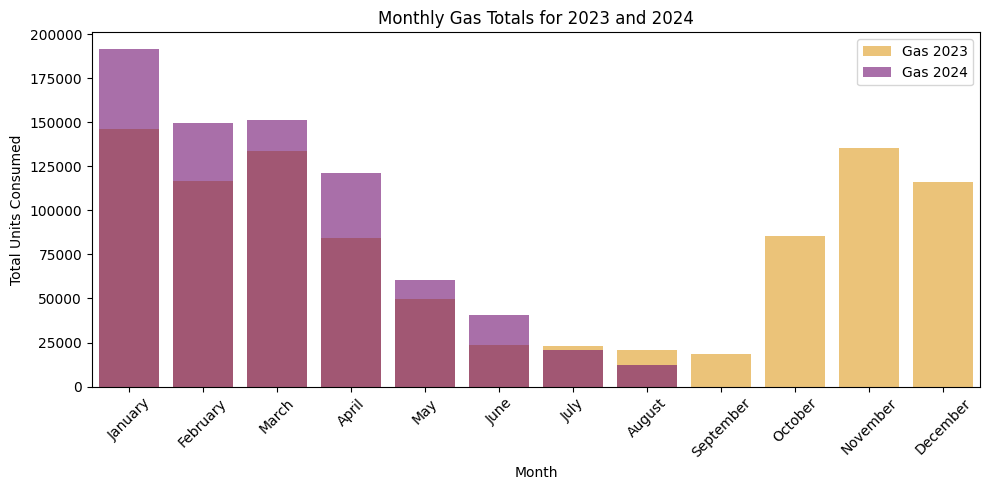

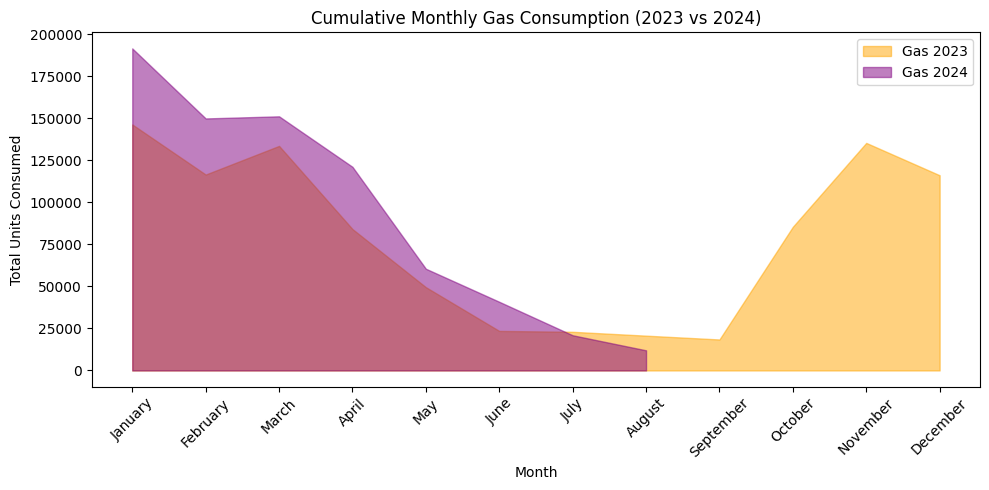

In [19]:
# Line Plot for Monthly Gas Consumption Comparison (2023 vs 2024)
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_gas_2023, x='Months_2023', y='total_units', label='Gas 2023', marker='o')
sns.lineplot(data=monthly_gas_2024, x='Months_2024', y='total_units', label='Gas 2024', marker='o')
plt.title('Monthly Gas Consumption (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Total Units Consumed')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Bar Plot for Monthly Gas Totals in 2023 and 2024
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_gas_2023, x='Months_2023', y='total_units', color='orange', alpha=0.6, label='Gas 2023')
sns.barplot(data=monthly_gas_2024, x='Months_2024', y='total_units', color='purple', alpha=0.6, label='Gas 2024')
plt.title('Monthly Gas Totals for 2023 and 2024')
plt.xlabel('Month')
plt.ylabel('Total Units Consumed')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Area Plot for Cumulative Monthly Gas Consumption (2023 vs 2024)
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_gas_2023['Months_2023'], monthly_gas_2023['total_units'], color="orange", alpha=0.5, label='Gas 2023')
plt.fill_between(monthly_gas_2024['Months_2024'], monthly_gas_2024['total_units'], color="purple", alpha=0.5, label='Gas 2024')
plt.title('Cumulative Monthly Gas Consumption (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Total Units Consumed')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



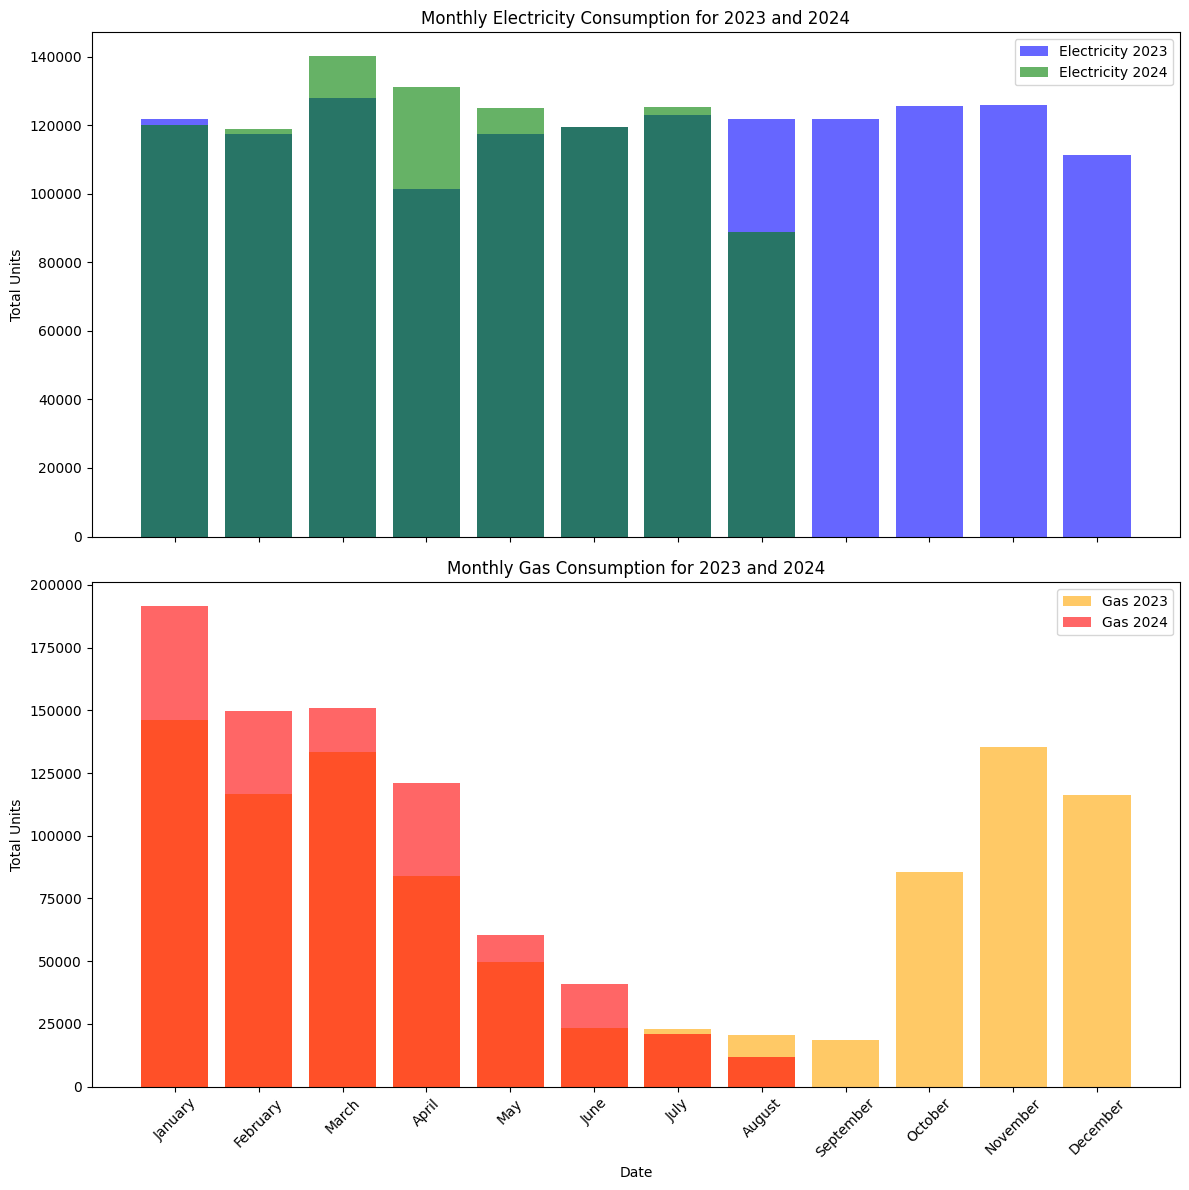

In [20]:
# Bar Plot: Monthly Totals Comparison for Electricity and Gas in 2023 vs 2024
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Electricity
axes[0].bar(monthly_electricity_2023['Months_2023'], monthly_electricity_2023['total_units'], color='blue', label='Electricity 2023', alpha=0.6)
axes[0].bar(monthly_electricity_2024['Months_2024'], monthly_electricity_2024['total_units'], color='green', label='Electricity 2024', alpha=0.6)
axes[0].set_title('Monthly Electricity Consumption for 2023 and 2024')
axes[0].legend()
axes[0].set_ylabel('Total Units')

# Gas
axes[1].bar(monthly_gas_2023['Months_2023'], monthly_gas_2023['total_units'], color='orange', label='Gas 2023', alpha=0.6)
axes[1].bar(monthly_gas_2024['Months_2024'], monthly_gas_2024['total_units'], color='red', label='Gas 2024', alpha=0.6)
axes[1].set_title('Monthly Gas Consumption for 2023 and 2024')
axes[1].legend()
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Units')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Plotting Heatmaps**

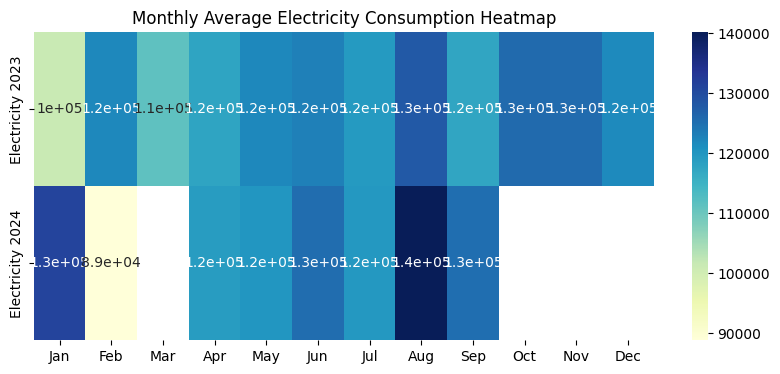

In [21]:
# Reshape data to create monthly averages (assuming daily data in each dataframe)
electricity_2023_pivot = monthly_electricity_2023.pivot_table(index=monthly_electricity_2023['Months_2023'], values='total_units', aggfunc='mean')
electricity_2024_pivot = monthly_electricity_2024.pivot_table(index=monthly_electricity_2024['Months_2024'], values='total_units', aggfunc='mean')
gas_2023_pivot = monthly_gas_2023.pivot_table(index=monthly_gas_2023['Months_2023'], values='total_units', aggfunc='mean')
gas_2024_pivot = monthly_gas_2024.pivot_table(index=monthly_gas_2024['Months_2024'], values='total_units', aggfunc='mean')

# Reindex the 2024 data to match the index of 2023 data (12 months)
electricity_2024_pivot = electricity_2024_pivot.reindex(electricity_2023_pivot.index, fill_value=np.nan) # Fill missing months with NaN
gas_2024_pivot = gas_2024_pivot.reindex(gas_2023_pivot.index, fill_value=np.nan) # Fill missing months with NaN


# Create a 2D array for electricity data (2 rows: 2023 and 2024, 12 columns: months)
electricity_data = [
    electricity_2023_pivot.values.flatten(),
    electricity_2024_pivot.values.flatten()
]

# Heatmap for Electricity Consumption (2023 and 2024)
plt.figure(figsize=(10, 4))
sns.heatmap(electricity_data, annot=True, cmap="YlGnBu", xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], yticklabels=['Electricity 2023', 'Electricity 2024'])
plt.title('Monthly Average Electricity Consumption Heatmap')
plt.show()



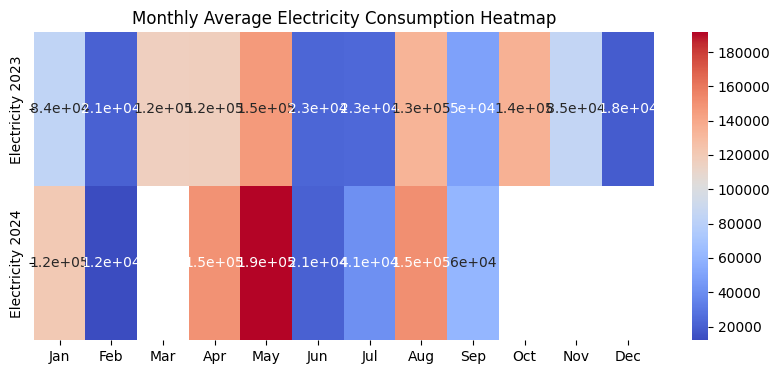

In [22]:
# Create a 2D array for gas data (2 rows: 2023 and 2024, 12 columns: months)
gas_data = [
    gas_2023_pivot.values.flatten(),
    gas_2024_pivot.values.flatten()
]

# Heatmap for Electricity Consumption (2023 and 2024)
plt.figure(figsize=(10, 4))
sns.heatmap(gas_data, annot=True, cmap="coolwarm", xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], yticklabels=['Electricity 2023', 'Electricity 2024'])
plt.title('Monthly Average Electricity Consumption Heatmap')
plt.show()
